# Introduction
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

**What?** Movie review with the IMDB dataset

</font>
</div>

# Theoretical recall: binary classification

<div class="alert alert-block alert-info">
<font color=black><br>

- Binary classification
- How to classify movie reviews as positive or negative, based on the text content of the reviews.-

<br></font>
</div>

# Import modules
<hr style="border:2px solid black"> </hr>

In [41]:
import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = 14, 5
rcParams['font.size'] = 20

# Load the datatest

<div class="alert alert-block alert-info">
<font color=black><br>

- 50,000 highly polarized reviews
- They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.
- 80 MB of data will be downloaded to your machine
- num_words=10000 means you’ll only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. This allows you to work with vector data of manageable size.
- The variables train_data and test_data are lists of reviews; each review is a list of word indices (encoding a sequence of words).

<br></font>
</div>

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [5]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [17]:
print(type(train_data))
print(train_data.ndim)
print(train_data.shape)

<class 'numpy.ndarray'>
1
(25000,)


In [7]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [8]:
# We are using only 10k most frequent words
max([max(sequence) for sequence in train_data])

9999

<div class="alert alert-block alert-info">
<font color=black><br>

Here’s how you can quickly decode one of these reviews back to English words. Did not get it!

<br></font>
</div>

In [9]:
word_index = imdb.get_word_index()
# Reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Decodes the reviews. Note that the indices are offset by 3 because 0,1 and 2 
# are reserved indices for padding
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [13]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

# Pre-processing

<div class="alert alert-block alert-info">
<font color=black><br>

- DDNs accept tensor as an input, when this is not the case you have the create one
- Encoding the integer sequences into a binary matrix
- One-hot encode your lists to turn them into vectors of 0s and 1s. 
- This would mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector that would be all 0s except for indices 3 and 5, which would be 1s.

<br></font>
</div>

In [18]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
          results[i, sequence] = 1.
    return results

In [19]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [24]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [21]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [23]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

# Building the NN

<div class="alert alert-block alert-info">
<font color=black><br>

- The NN consists of 16 hidden simple stack of fully connected (dense) layers with RELUs
- 16 hidden units means the weight matrix W will have shape (input_dimension, 16)
- The dot product with W will project the input data onto a 16-dimensional representation space 
- Then you’ll add the bias vector b and apply the relu operation).
- The intermediate layers will use relu as their activation function
- The final layer will use a sigmoid activation so as to output a probability (a score between 0 and 1)


<br></font>
</div>

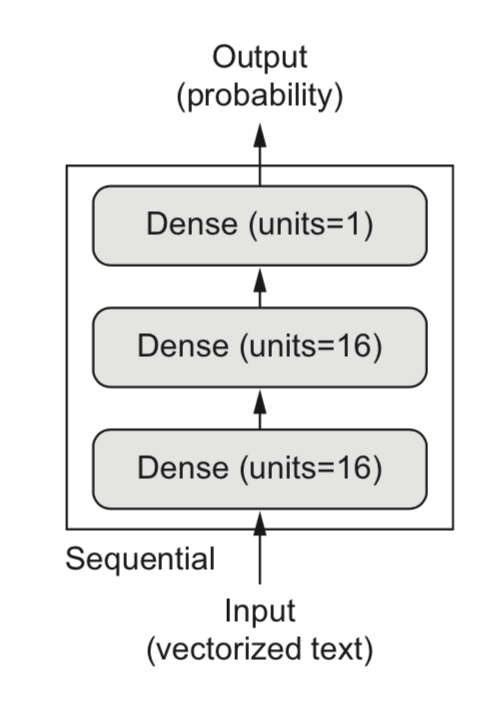

In [26]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compiling the model

In [30]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [31]:
# Alternatively you can also configure the optimiser directly
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

In [32]:
# another alternative is
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
                      loss=losses.binary_crossentropy,
                      metrics=[metrics.binary_accuracy])

<div class="alert alert-block alert-info">
<font color=black><br>

In order to **monitor** during training the accuracy of the model on data it has never seen before, you’ll create a validation set by setting apart 10,000 samples **from** the original training data.

<br></font>
</div>

In [35]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Training the model

<div class="alert alert-block alert-info">
<font color=black><br>

- Train the model for 20 epochs (20 iterations over all samples in the x_train and y_train tensors)
- Use mini-batches of 512 samples
- Monitor loss and accuracy on the 10,000 samples that you set apart. 

<br></font>
</div>

In [36]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 82ms/step - loss: 0.5435 - acc: 0.7875 - val_loss: 0.4205 - val_acc: 0.8546
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3337 - acc: 0.8997 - val_loss: 0.3374 - val_acc: 0.8653
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2427 - acc: 0.9237 - val_loss: 0.2854 - val_acc: 0.8909
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1910 - acc: 0.9386 - val_loss: 0.3027 - val_acc: 0.8768
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1559 - acc: 0.9506 - val_loss: 0.2765 - val_acc: 0.8884
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1312 - acc: 0.9594 - val_loss: 0.2852 - val_acc: 0.8861
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1075 - acc: 0.9672 - val_loss: 0.3085 - val_acc: 0.8823
Epoch 8/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0915 - a

In [37]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

# Post-processing

<div class="alert alert-block alert-info">
<font color=black><br>

- The **training** loss decreases with every epoch, and the training accuracy increases with every epoch.
- The **validation** loss and accurcy follow a different trend: they peak at the 4th epoch
- This is classical case of **overfitting**
- To avoid this you can (other options are available) stop the training at the 4th epoch

<br></font>
</div>

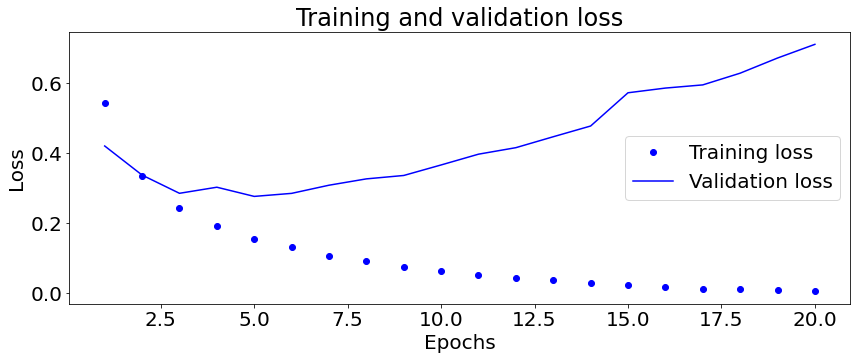

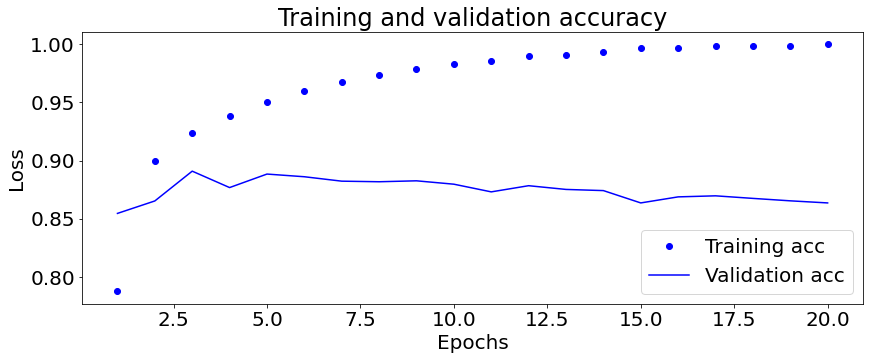

In [47]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf() 
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']
plt.plot(epochs, history_dict['acc'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_acc'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Avoiding overfitting

<div class="alert alert-block alert-info">
<font color=black><br>

- This fairly naive approach achieves an accuracy of 88%. 
- With state-of-the-art approaches, you should be able to get close to 95%.

<br></font>
</div>

In [48]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.4436 - accuracy: 0.8310
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2540 - accuracy: 0.9106
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.1980 - accuracy: 0.9299
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3224 - accuracy: 0.8738


In [49]:
results

[0.32237517833709717, 0.8737999796867371]

# Predicting on new data

<div class="alert alert-block alert-info">
<font color=black><br>

As you can see, the network is confident for some samples (0.99 or more, or 0.01 or
less) but less confident for others (0.6, 0.4).

<br></font>
</div>

In [51]:
model.predict(x_test)

array([[0.24247321],
       [0.99983585],
       [0.9604665 ],
       ...,
       [0.17334032],
       [0.15999708],
       [0.82505906]], dtype=float32)

# Conclusion

<div class="alert alert-block alert-danger">
<font color=black><br>

- There is quite a lot of pre-processng to do
- Dense + relu NN are pretty flexible
- In binary classification, the network should end with a sigmoid activation function
- WIn binary classification, the loss function function soulf be: binayr_crossentropy
- RMSprop is pretty good whatever your problem
- Look out for overfitting

<br></font>
</div>

# References
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

- https://github.com/fchollet/deep-learning-with-python-notebooks
- Chollet, Francois. Deep learning with Python. Vol. 361. New York: Manning, 2018

</font>
</div>